# DIS08 / OR92 Data Modeling: Python - Data Science Packages and Basics of Machine Learning

Timo Breuer, Faculty of Information Science and Communication Studies, Institute of Information Management

---
## Scope of today's session
---
 
- Overview of common Python data science packages
- Commonly used datasets (in education) 
- Basic statistics (with pandas)
- Data visualisation (with pandas, seaborn, matplotlib)
- Basic introduction to machine learning pipelines (with sklearn and tensorflow)

---
## Common Python Packages for Data Science 
--- 

**Data acquisition / web scraping / parsing**
- requests: https://docs.python-requests.org/en/latest/index.html
- beautifulsoup: https://beautiful-soup-4.readthedocs.io/en/latest/
- scrapy: https://scrapy.org/
- parsel: https://parsel.readthedocs.io/en/latest/

**Data analysis / numerical operations / statistics**
- pandas: https://pandas.pydata.org/
- numpy: http://www.numpy.org/
- scipy: https://www.scipy.org/
- statsmodels: https://www.statsmodels.org/stable/index.html

**Data visualisation / presentation**
- matplotlib: https://matplotlib.org/
- seaborn: https://seaborn.pydata.org/
- bokeh: https://bokeh.org/
- plotly: https://plotly.com/

**Machine learning / deep learning** 
- scikit-learn: https://scikit-learn.org/stable/
- tensorflow: https://www.tensorflow.org/
- keras: https://keras.io/
- pytorch: https://pytorch.org/

---
## Common Datasets
---

**Note: Many of these datasets can be directly loaded from data science packages, e.g., sklearn or seaborn. There is no need to download the datasets with your own scripts from the original source or somewhere else.**

### 1. Iris Dataset

**Description:** The Iris dataset is one of the most famous datasets in machine learning. It contains measurements of iris flowers from three different species: Setosa, Versicolor, and Virginica. The dataset includes four features: sepal length, sepal width, petal length, and petal width.

**Use Cases:** It is often used for classification tasks, particularly for demonstrating algorithms like k-Nearest Neighbors (k-NN), decision trees, and support vector machines (SVM).

**Size:** The dataset consists of 150 samples, with 50 samples for each species.

**Source:** https://archive.ics.uci.edu/dataset/53/iris

### 2. Titanic Dataset

**Description:** The Titanic dataset contains information about the passengers aboard the Titanic, including whether they survived or not. Features include passenger class, sex, age, number of siblings/spouses aboard, number of parents/children aboard, fare paid, and more.

**Use Cases:** This dataset is commonly used for binary classification tasks, such as predicting survival based on various features. It is also useful for demonstrating data preprocessing, feature engineering, and exploratory data analysis.

**Size:** The dataset contains 891 entries.

**Source:** https://www.openml.org/search?type=data&sort=runs&id=40945&status=active

### 3. Wine Quality Dataset

**Description:** The Wine Quality dataset contains information about red and white wines from Portugal. It includes various physicochemical tests (e.g., acidity, sugar, pH, alcohol content) and a quality score (ranging from 0 to 10) assigned by wine experts. The dataset is divided into two parts: one for red wine and one for white wine.

**Use Cases:** This dataset is typically used for regression tasks (predicting the quality score) and classification tasks (classifying wines into quality categories). It is useful for demonstrating regression algorithms, classification algorithms, and techniques for handling imbalanced datasets.

**Size:** The red wine dataset contains 1,599 samples, while the white wine dataset contains 4,898 samples.

**Source:** https://archive.ics.uci.edu/dataset/186/wine+quality

### (4. MNIST Dataset)

**Description:** The MNIST dataset is a large collection of handwritten digits (0-9) that is widely used for training various image processing systems. It consists of grayscale images of size 28x28 pixels, along with their corresponding labels.

**Use Cases:** This dataset is primarily used for image classification tasks and is a standard benchmark for evaluating machine learning algorithms, particularly convolutional neural networks (CNNs).

**Size:** The dataset contains 70,000 images, with 60,000 for training and 10,000 for testing.

**Source:** https://yann.lecun.com/exdb/mnist/


### (5. Boston Housing Dataset)

**Description:** The Boston Housing dataset contains information about housing values in suburbs of Boston. It includes features such as the number of rooms, crime rate, property tax rate, and distance to employment centers, among others. The target variable is the median value of owner-occupied homes.

**Use Cases:** This dataset is typically used for regression tasks, where the goal is to predict housing prices based on the features. It is often used to demonstrate linear regression and other regression algorithms.

**Size:** The dataset consists of 506 samples.

**Source:** https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

**WARNING:** This dataset has ethical problems and some packages do not support their use anymore. For instance: https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html This dataset is included in this overview to make you aware of this issue, as this dataset is quite popular.

_(In the following, we will focus on the first three datasets. The MNIST dataset is used for image classification tasks and is slightly out of scope. However, it might be useful to know about this dataset at some point in the future. **The use of the Boston Housing Dataset is also not recommended.**)_


---
## Basic statistics with pandas
---

Install the required packages first

In [ ]:
!pip install scikit-learn pandas numpy matplotlib seaborn tensorflow

### 1. Descriptive Statistics

**Dataset:** Iris  
**Problem:** Calculate mean, median, and standard deviation for each numeric column.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True).frame
iris

In [ ]:
iris.describe()

In [ ]:
import ssl
import seaborn as sns

# SSL-Warnung deaktivieren
ssl._create_default_https_context = ssl._create_unverified_context

# Titanic-Datensatz laden
titanic = sns.load_dataset("titanic")
print(titanic.head())

### 2. Group-wise Statistics

**Dataset:** Titanic  
**Problem:** Compute average age for passengers grouped by class and survival status.

In [ ]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic

In [ ]:
titanic.groupby(['class', 'survived'])['age'].mean()

### 3. Frequency Distribution

**Dataset:** Titanic  
**Problem:** Count the number of passengers in each embarkation port.

In [ ]:
titanic['embark_town'].value_counts()

### 4. Data Imbalance Check

**Dataset:** Wine Quality  
**Problem:** Check the distribution of wine quality scores.

In [ ]:
import pandas as pd
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
wine['quality'].value_counts()

### 5. Skewness and Kurtosis

**Dataset:** Iris  
**Problem:** Analyze skewness and kurtosis of petal length and width.

**See also:**
- https://en.wikipedia.org/wiki/Skewness
- https://en.wikipedia.org/wiki/Kurtosis
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [ ]:
from scipy.stats import skew, kurtosis

print("Skewness:", iris[['petal length (cm)', 'petal width (cm)']].apply(skew))
print("Kurtosis:", iris[['petal length (cm)', 'petal width (cm)']].apply(kurtosis))

### 7. Missing Value Analysis

**Dataset:** Titanic  
**Problem:** Check for missing values and calculate the percentage of missing data for each column.

In [ ]:
titanic.isnull()

In [ ]:
titanic.isnull().sum() / len(titanic) * 100

### 8. Feature Comparisons

**Dataset:** Wine Quality  
**Problem:** Compare average alcohol content for wines of different quality levels.

In [ ]:
wine.groupby('quality')['alcohol'].mean()

### 9. Class Imbalance in a Target Variable

**Dataset:** Titanic  
**Problem:** Assess the survival rate by analyzing the survived column.

In [ ]:
titanic['survived'].value_counts(normalize=True) * 100

---
## Data visualisation
---

### 1. Histogram for Distribution

**Dataset:** Wine Quality  
**Problem:** Visualize the distribution of alcohol content.

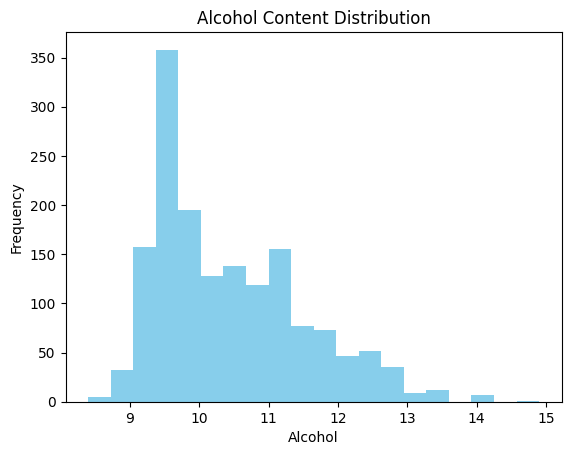

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
wine['alcohol'].plot(kind='hist', bins=20, title='Alcohol Content Distribution', color='skyblue')
plt.xlabel('Alcohol')
plt.show()

### 2. Boxplot for Outlier Detection

**Dataset:** Iris  
**Problem:** Identify outliers in sepal length for different species.

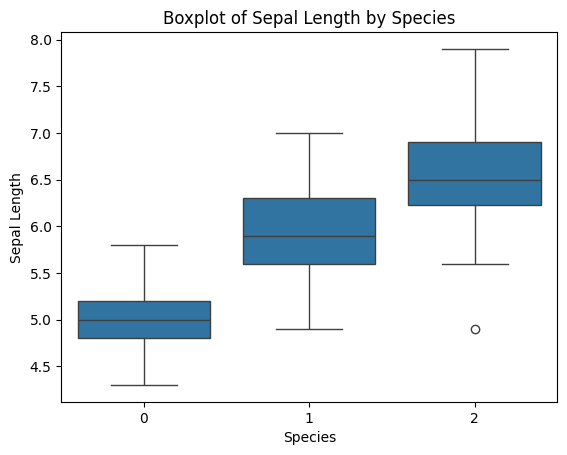

In [16]:
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris(as_frame=True).frame
sns.boxplot(x='target', y='sepal length (cm)', data=iris)
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Boxplot of Sepal Length by Species')
plt.show()

### 3. Correlation Heatmap

**Dataset:** Wine Quality  
**Problem:** Visualize correlation among numeric features.

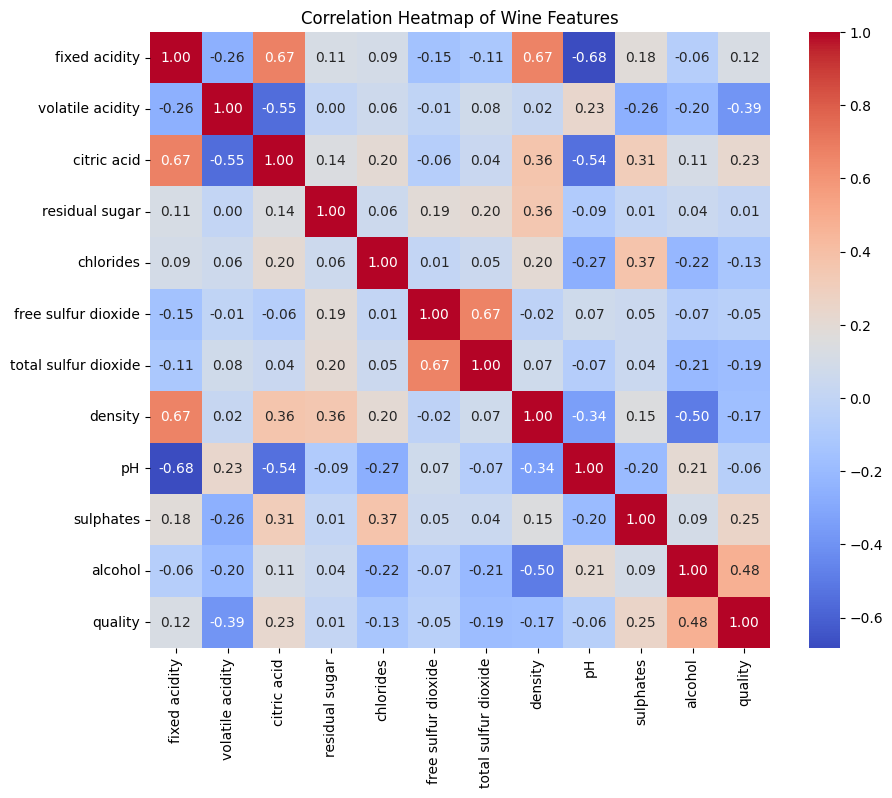

In [17]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(wine.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Wine Features')
plt.show()

### 4. Pairplot for Feature Relationships

**Dataset:** Iris  
**Problem:** Visualize pairwise relationships between features.

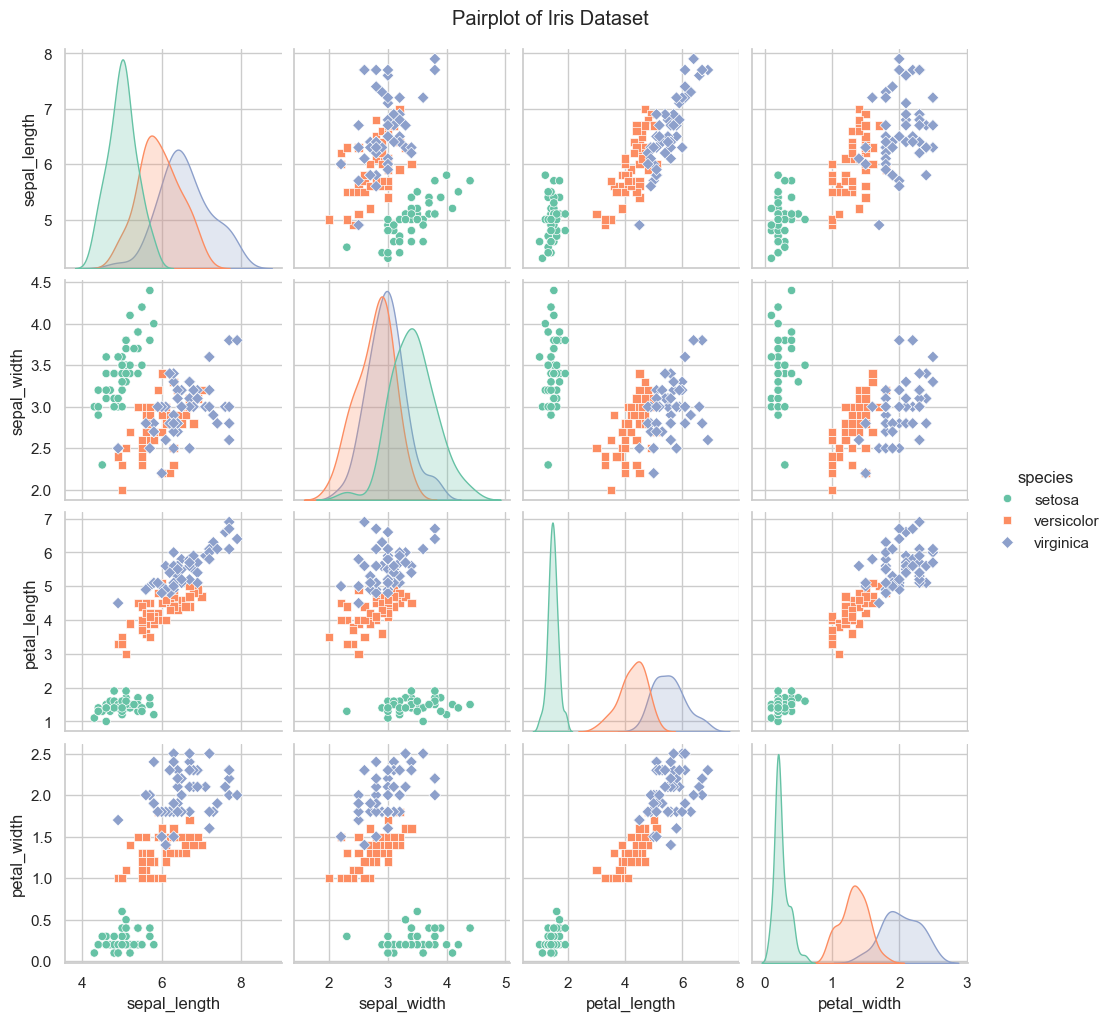

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Create a pairplot
sns.set(style='whitegrid')
pairplot = sns.pairplot(iris, hue='species', palette='Set2', markers=["o", "s", "D"])

# Add a title
plt.suptitle('Pairplot of Iris Dataset', y=1.02)

# Show the plot
plt.show()

### 5. Bar Plot for Counts

**Dataset:** Titanic  
**Problem:** Show the number of survivors and non-survivors.

In [ ]:
titanic = sns.load_dataset('titanic')
sns.countplot(x='survived', data=titanic, palette='pastel')
plt.title('Survival Counts')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### 6. FacetGrid for Subplots

**Dataset:** Titanic  
**Problem:** Create age distribution plots for different classes.

In [ ]:
g = sns.FacetGrid(titanic, col='class', height=4, aspect=1.2)
g.map(sns.histplot, 'age', bins=20, kde=True, color='purple')
g.set_titles('{col_name} Class')
g.set_axis_labels('Age', 'Count')
plt.show()

### 7. Scatter Plot for Feature Relationships

**Dataset:** Iris  
**Problem:** Visualize the relationship between petal length and width

In [ ]:
iris

In [ ]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='deep')
plt.title('Petal Length vs. Width by Species')
plt.show()

### 8. Violin Plot for Distribution

**Dataset:** Wine Quality  
**Problem:** Compare pH levels for different quality levels.

In [ ]:
sns.violinplot(x='quality', y='pH', data=wine, palette='muted')
plt.title('Distribution of pH by Wine Quality')
plt.show()

### 9. Line Plot for Trends

**Dataset:** Titanic  
**Problem:** Show survival rate trends by age.

In [ ]:
survival_rate_by_age = titanic.groupby('age')['survived'].mean().dropna()
survival_rate_by_age.plot(kind='line', figsize=(10, 5), color='green')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.grid()
plt.show()

### 10. Stacked Bar Chart for Group Comparisons

**Dataset:** Titanic  
**Problem:** Compare survival rates across gender and class.

In [ ]:
survival_class_gender = titanic.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean')
survival_class_gender.plot(kind='bar', stacked=True, figsize=(8, 6), color=['orange', 'lightblue'])
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.show()

---
## Basic introduction to machine learning pipelines
---

There are many machine learning methods and we cannot cover all of them in today's session. To get an overview of relevant and related topics, take a look at scikit-learn that covers many ML methods and concepts: https://scikit-learn.org/stable/index.html

Important topics are among others:
- Classification Methods
- Regression Methods
- Clustering Methods
- Dimensionality Reduction
- Preprocessing Methods
- Model Selection and Evaluation

Instead of going into breadth, we take a look at some popular methods, including **k-nearest neighbors**, **logistic regression**, **random forest**, and **neural networks**. 

### K-Nearest Neighbors (KNN)

K-Nearest Neighbors is a simple, instance-based learning algorithm used for classification and regression. The algorithm classifies a data point based on how its neighbors are classified. 

**Algorithm Steps:**
1. Choose the number of neighbors $ k $.
2. For a given test point, calculate the distance to all training points.
3. Identify the $ k $ nearest neighbors.
4. Assign the class label based on the majority class among the neighbors.

**Distance Metric:**
The most common distance metric used is the Euclidean distance, defined as:

$$d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$$

where $ p $ and $ q $ are two points in $ n $-dimensional space.


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

### Logistic Regression

Logistic Regression is a statistical method for predicting binary classes. The output of the model is a probability that the given input point belongs to a certain class.

**Model Equation:**
The logistic function (sigmoid function) is used to map predicted values to probabilities:

$$P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n)}}$$

where:
- $ P(Y=1|X) $ is the probability of the positive class given input features $ X $.
- $ \beta_0 $ is the intercept.
- $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients for each feature $ X_1, X_2, \ldots, X_n $.

**Decision Boundary:**
The decision boundary is determined by setting the probability threshold (commonly 0.5):

$$\text{If } P(Y=1|X) \geq 0.5 \text{, predict } Y=1; \text{ otherwise, predict } Y=0. 


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic') 

# Preprocess the data (basic preprocessing)
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})
titanic_df = titanic_df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'survived']].dropna()

# Split the dataset
X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

### Random Forest Classifier

Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (for classification) or the mean prediction (for regression) of the individual trees.

**Model Concept:**
1. **Bootstrap Aggregating (Bagging):** Randomly sample the dataset with replacement to create multiple subsets.
2. **Decision Trees:** For each subset, build a decision tree using a random subset of features.
3. **Voting/Averaging:** For classification, the final prediction is made by majority voting among the trees.

**Decision Tree Splitting Criterion:**
The most common criteria for splitting nodes in a decision tree are Gini impurity and entropy.

- **Gini Impurity:**
$$Gini(D) = 1 - \sum_{i=1}^{C} p_i^2$$
where $ p_i $ is the proportion of class $ i $ in dataset $ D $.

- **Entropy:**
$$Entropy(D) = -\sum_{i=1}^{C} p_i \log_2(p_i)$$
where $ C $ is the number of classes.

**Final Prediction:**
For classification tasks, the final prediction is made by taking the majority vote from all the individual decision trees in the forest.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Wine Quality dataset
# wine_df = pd.read_csv('winequality-red.csv')  # Ensure you have the dataset in the same directory
wine_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

# Split the dataset
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

### Neural Network for Iris Dataset with TensorFlow

A neural network is a computational model inspired by the way biological neural networks in the human brain process information. It consists of layers of interconnected nodes (neurons) that can learn complex patterns in data.

**Model Architecture:**
- Input Layer: 4 neurons (one for each feature: sepal length, sepal width, petal length, petal width).
- Hidden Layer: A configurable number of neurons (e.g., 16).
- Hidden Layer: A configurable number of neurons (e.g., 8).
- Output Layer: 3 neurons (one for each class of Iris).

**Activation Function:**
The activation function introduces non-linearity into the model. A common choice is the ReLU (Rectified Linear Unit) function:

$$f(x) = \max(0, x)$$

For the output layer, the softmax function is often used for multi-class classification:

$$P(y_i|x) = \frac{e^{z_i}}{\sum_{j=1}^{C} e^{z_j}}$$

**Loss Function:**
For multi-class classification, the categorical cross-entropy loss is commonly used:

$$L(y, \hat{y}) = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)$$

where $ y $ is the true label and $ \hat{y} $ is the predicted probability distribution.


In [ ]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target.reshape(-1, 1)  # Target (reshaped to column vector)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Build the Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
    tf.keras.layers.Dense(8, activation='relu'),  # Hidden layer 2
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer (3 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on new data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Display predictions and true classes
print("Predicted classes:", predicted_classes)
print("True classes:", true_classes)

_What happened in the code above?_ 

**Neural Network Structure:**  
- **Input Layer:** Takes 4 features (sepal length, sepal width, petal length, petal width).
- **Hidden Layers:** Two hidden layers with ReLU activation.
- **Output Layer:** Three neurons (for the three Iris classes) with softmax activation.
Preprocessing: One-Hot Encoding: Converts class labels (0, 1, 2) into one-hot vectors. Feature Scaling: Standardizes the feature values for better performance.

**Loss Function:** categorical_crossentropy is used since this is a multi-class classification problem.

**Metrics:** Accuracy is used as the performance metric.

**Training:** Uses the Adam optimizer with 100 epochs and a batch size of 8. A validation split of 20% is used for monitoring overfitting.

**Evaluation:** The model is evaluated on the test set, and accuracy is reported. Predictions are converted from probabilities to class labels using np.argmax.

### Neural Network for Titanic Dataset with TensorFlow

A neural network can be used to predict survival on the Titanic based on various features such as passenger class, sex, age, and fare.

**Model Architecture:**
- Input Layer: Number of neurons equal to the number of features (e.g., 6 after preprocessing).
- Hidden Layer: A configurable number of neurons (e.g., 10-20).
- Output Layer: 1 neuron (for binary classification: survived or not).

**Activation Function:**
Commonly used activation functions include ReLU for hidden layers:

$$f(x) = \max(0, x)$$

For the output layer, the sigmoid function is used for binary classification:

$$P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n)}}$$

**Loss Function:**
For binary classification, the binary cross-entropy loss is used:

$$L(y, \hat{y}) = -\left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)$$


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic') 

# Preprocess the data (basic preprocessing)
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})
titanic_df = titanic_df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'survived']].dropna()

# Split the dataset
X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

_What happened in the code above?_ 
 
**Data Loading and Preprocessing:** The Titanic dataset is loaded, and basic preprocessing is performed, including encoding the 'sex' feature and dropping rows with missing values.

**Feature and Target Separation:** The features (X) and target variable (y) are separated.

**Train-Test Split:** The dataset is split into training and testing sets.

**Feature Scaling:** The features are standardized using StandardScaler.

**Model Building:** A simple neural network model is created with one hidden layer using ReLU activation and an output layer with a sigmoid activation function.

**Model Compilation:** The model is compiled with the Adam optimizer and binary cross-entropy loss.

**Model Training:** The model is trained on the training data.

**Model Evaluation:** The model is evaluated on the test data, and the accuracy is printed.


### Neural Network for Wine Quality Dataset with TensorFlow

A neural network can be used to predict the quality of wine based on various chemical properties.

**Model Architecture:**
- Input Layer: Number of neurons equal to the number of features (e.g., 11 for the Wine Quality dataset).
- Hidden Layer: A configurable number of neurons (e.g., 10-30).
- Output Layer: 1 neuron (for regression predicting wine quality on a scale).

**Activation Function:**
ReLU is commonly used for hidden layers:

$$f(x) = \max(0, x)$$

For the output layer, a linear activation function is used for regression:

$$f(x) = x$$

**Loss Function:**
For regression tasks, the mean squared error (MSE) is commonly used:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load the Wine Quality dataset
wine_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1)
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {mae:.2f}')

_What happened in the code above?_ 

**Data Loading:** The Wine Quality dataset is loaded into a DataFrame.

**Feature and Target Separation:** The features (X) and target variable (y) are separated, with 'quality' as the target.

**Train-Test Split:** The dataset is split into training and testing sets.

**Feature Scaling:** The features are standardized using StandardScaler.

**Model Building:** A simple neural network model is created with one hidden layer using ReLU activation and an output layer with a linear activation function.

**Model Compilation:** The model is compiled with the Adam optimizer and mean squared error loss.

**Model Training:** The model is trained on the training data.

**Model Evaluation:** The model is evaluated on the test data, and the mean absolute error (MAE) is printed.


---
## Lab assignment
---

In order to recap the things you have learned today. You will apply the concepts and methods to another dataset. **Pick one** of the following datasets and conduct some reasonable methods for basic statistics, data visualization, and machine learning.

- **Adult Income Dataset:** https://archive.ics.uci.edu/ml/datasets/adult
- **Heart Disease Dataset:** https://www.kaggle.com/ronitf/heart-disease-uci
- **NYC Airbnb Listings:** http://insideairbnb.com/get-the-data.html
- **COVID-19 Data:** https://github.com/owid/covid-19-data
- **Car Evaluation Dataset:** https://archive.ics.uci.edu/ml/datasets/car+evaluation
- **World Happiness Report:** https://worldhappiness.report/
- **Supermarket Sales Dataset:** https://www.kaggle.com/aungpyaeap/supermarket-sales

Erste 5 Zeilen der Daten:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

Zusammenfassung der Daten:
       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210

Verteilung der Zielvariable (class):
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


/var/folders/gt/gb3pwwnj3sd85bklb2cm2txm0000gn/T/ipykernel_6924/2479348321.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=car_data, palette="muted")


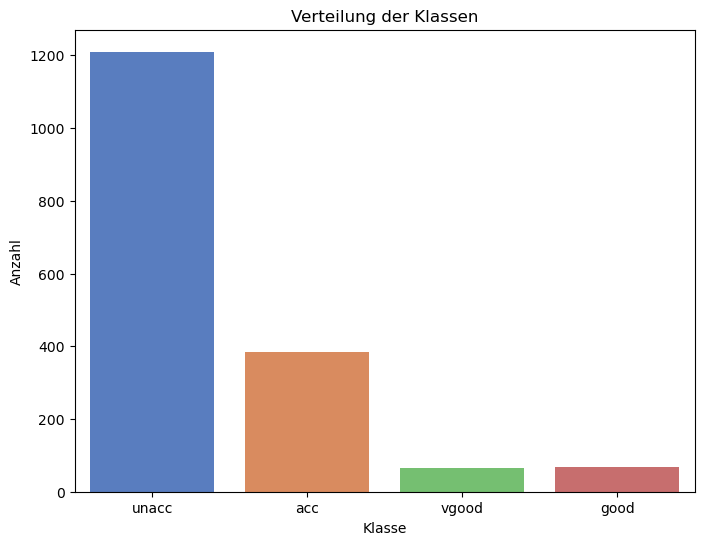

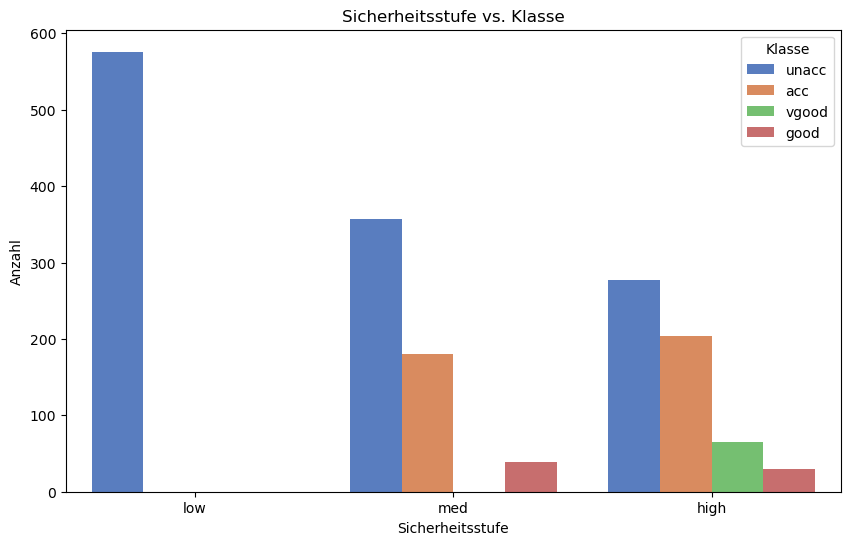

In [2]:
# Importieren der notwendigen Bibliotheken
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Datenimport und Überblick
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
car_data = pd.read_csv("/Users/cemilhantozak/Downloads/Studium/DIS08-Github/car+evaluation/car.data", header=None, names=column_names)


# Datenübersicht
print("Erste 5 Zeilen der Daten:")
print(car_data.head())

print("\nZusammenfassung der Daten:")
print(car_data.describe(include="all"))

# 2. Explorative Datenanalyse
print("\nVerteilung der Zielvariable (class):")
print(car_data["class"].value_counts())

# Visualisierung der Zielvariable
plt.figure(figsize=(8, 6))
sns.countplot(x="class", data=car_data, palette="muted")
plt.title("Verteilung der Klassen")
plt.xlabel("Klasse")
plt.ylabel("Anzahl")
plt.show()

# 3. Beziehung zwischen Variablen analysieren
plt.figure(figsize=(10, 6))
sns.countplot(x="safety", hue="class", data=car_data, palette="muted")
plt.title("Sicherheitsstufe vs. Klasse")
plt.xlabel("Sicherheitsstufe")
plt.ylabel("Anzahl")
plt.legend(title="Klasse")
plt.show()